# ScheduledFlows

## Overview
The idea of this module is to create an emissions scenario -- a _schedule_ -- that describes how much carbon humans have released to the atmosphere in the past, and that makes projections about future emissions. 

## Mathematical form of anthropogenic emissions
The emissions scenario generated here has the form 

$$
\epsilon(t) = {e^{kt} \ \sigma_{down}(t)} \ N   \ \ \ \ \ (1)
$$

where $\epsilon$ is understood to be a rate of emission of carbon into the atmosphere, on a per-year basis, as a function of time, $t$. You can see that there are three parts, starting with the exponential term, $e^{kt}$, and ending with the factor "$N$". Let's have a look at these parts piece by piece.

## Exponential growth
The exponential term, which we'll also write as $exp(kt)$, describes a kind of growth characterized by a doubling time: after every so many years, $e^{kt}$ becomes twice as large as it was before. This doubling time is governed by the constant $k$, which is called a *rate constant*. A large value of $k$ implies faster growth, and therefore less time between doubling events. Part of your job will be to find a reasonable value for $k$, but a good guess is to say that in the last few hundred years, carbon emissions (like human population) doubled about every 30 years, which implies a growth rate of roughly $2.5\%$ per year. That, in turn, implies $k=0.025 \ yr^{-1}$. 

## Decarbonization by a step-down sigmoid function
The next term is a step-down sigmoid function, $\sigma_{down}$. This function describes humanity's decarbonization transition. How? Well, it's centered around a _transition year_, $t_{trans}$. Long before the transition year, $\sigma_{down}=1$, whereas long afterward, $\sigma_{down}=0$. In the transition year itself, when $t=t_{trans}$, $\sigma_{down}={1\over2}$, which means decarbonization is halfway complete. 


You might guess that $\sigma_{down}$ requires one more parameter, which concerns how _fast_ the transition occurs. This is specified by a _transition time interval_, $\Delta t_{trans}$. $\Delta t_{trans}$ is equal to about the time it takes for $\sigma_{down}$ to get from $0.8$ to $0.2$ (the "80/20" rule). In the example below, we've set $t_{trans}$ and $\Delta t_{trans}$ to default values, but part of your job will be to choose your own values for these parameters.

As it turns out, some users prefer to specify the *year of peak emissions*, and use that value to compute the above-mentioned *transition year*. The relationship is 

$$
t_{trans} = t_{peak} + 
{\Delta t_{trans} \over 3} log \big ( 
{ 3 \over {k \Delta t_{trans}}} -1
\big ) 
\ \ \ (2)
$$

## Normalization
The $N$ in Eq. (1) provides us a way to guarantee that our emissions model is correct at a least at one year. This is called "normalization" (or sometimes "pegging"). Let's say the year in question is $t_o$, and we want to peg the emissions that year to the value $\epsilon_o$. That is to say, it's convenient to *parameterize* $N$ using desired values of $\epsilon_o$ and $t_o$. A formula for $N$ that accomplishes this is 

$$
N = {\epsilon_o \over {exp(kt_o) \ \sigma_{down}(t_o)}}   \ \ \ \ \ (3)
$$

In the example below, we've specified some default values, but part of your job will be to find a reasonable and defensible range of values of $t_o$ and $\epsilon_o$. 

By the way, it turns out that Eq. (3) works for any choice of the growth rate. That's pretty handy because it means that even if we happen to choose an unrealistic value for $k$, we'll still get the right emission in one particular year -- $t_o$!


## Metadata and functions
Part of good coding practice is finding ways to save data in a way that is "self-documenting." Like, including the units of your data, or other parameters. Fortunately, with a combination of Python's _Pandas_ package, and a built-in Python feature called _dictionaries_, we can do all that. So we'll be learning a bit about _Pandas_ and _dictionaries_ too.

Another part of good coding practice is to find ways to re-use code. Here, you'll be doing that using Python _functions_.

## Computing skills

- I can set up functions in python, and am familiar with methodolgies for ensuring they are working.
- I can use pandas and dictionaries to write data and associated metadata to a file.

## Climate science skills

- I can describe how exponential growth is represented mathematically.
- I can describe how a sigmoid (step) function is represented mathematically.
- I understand the purpose of normalization, and can paramaterize a normalization factor according to a desired emissions scenario.
- I have a quantitative sense of past carbon emissions.
- I can read doubling times for exponential growth off a graph, and I can predict that doubling time based on the rate constant ($k$) of the growth.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5io

In [2]:
%matplotlib notebook

### Timeline parameters 
The variables below specify the timeline and emissions parameters as default values so that you can see how the rest of this CGI works. 

However, by the time you submit this CGI, you should come back to this cell and change some variable values to values appropriate to your modeling needs. For example, the default starting time is way too late to capture all human emissions -- you'll need to revise t_start to something like 1700 or 1800 to accomplish that. You should also (again, not on your first pass through, but before submitting) revise t_stop to something farther into the future, like the year 2100 or 2200. Don't forget to do a Cell/Run All after you do so, so you can see how everything plays out.

In [3]:
# First lay out an array of times
t_start = 2000
t_stop = 2060
nsteps = 1000
t = np.linspace(t_start,t_stop,nsteps)

# Specify the year of peak emissions and the transition time interval
t_peak = 2030
delta_t_trans = 20

# Parameters for pegging
t_0 = 2018
eps_0 = 12.4

### Exponential growth
In the cell below, we've calculated and plotted an exponential growth curve with a growth rate of $2.9 \%$.

<IPython.core.display.Javascript object>


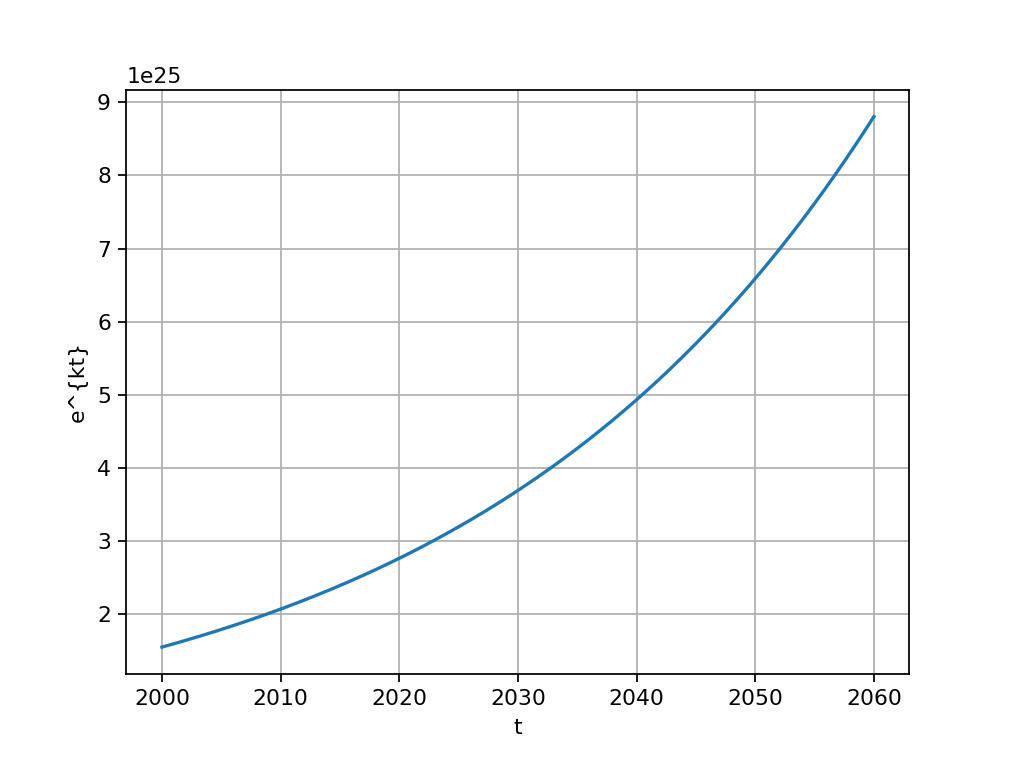

In [4]:
kexample = 0.029
myexp1 = np.exp(kexample*t)
plt.figure()
plt.plot(t,myexp1)
plt.xlabel('t')
plt.ylabel('e^{kt}')
plt.grid(True)

### Pause for analysis
In this curve, you can see that between the years 2009 and 2033, $e^{kt}$ rose from 2 to 4 -- i.e., it doubled in about 24 years. The idea of exponential growth would say that the *next* doubling would take another 24 years or so. Does that work out? Spell this out in the cell below -- like, in what year did $e^{kt}$ double from 4 to 8? How many years (from 2033) did that take?

### BEGIN SOLUTION
$e^{kt}$ rises from 4 to 8 between the years 2033 and 2057, which is a time interval of 24 years.
### END SOLUTION

### Your turn
In the cell below, construct an exponential growth curve using a growth rate of $2.5 \%$. For consistency with the ensuing cells, name the growth rate constant $k$, and name the resulting array "myexp". 


Then plot myexp as a function of time (t) to make sure it looks OK.

<IPython.core.display.Javascript object>


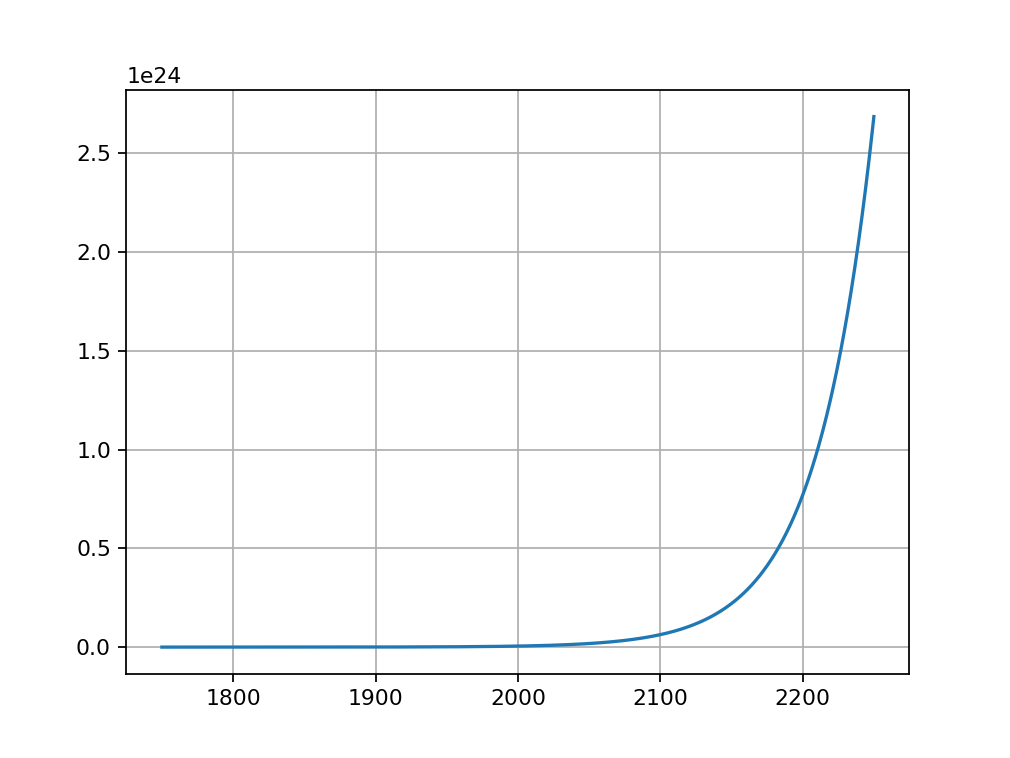

In [5]:
# Specify parameter k corresponding to a growth rate of 2.5%
### BEGIN SOLUTION
k = 0.025

# This is for later
final_runthrough = True
if final_runthrough:
    t_start = 1750
    t_stop = 2250
    nsteps = 5000
    eps_0 = 12.4
    t_0 = 2018
    t = np.linspace(t_start,t_stop,nsteps)
    
    t_trans = 2030
    delta_t_trans = 20

### END SOLUTION

# Calculate the array corresponding to e^(kt)
### BEGIN SOLUTION
myexp = np.exp(k*t)
plt.figure()
plt.plot()
plt.plot(t,myexp)
plt.grid(True)
# plt.ylim([0,6e22])
### END SOLUTION

### Pause for analysis
Since $k$ is *smaller* than before, we expect the doubling time to be larger than 24 years. Inspect this graph to estimate the new doubling time, and write your answer in the cell below. 

There's a handy formula, by the way, for predicting the doubling time: it's $70/k$ (with $k$ in $\%$). Does the value you get from that formula agree with what you got from reading the graph?

### BEGIN SOLUTION
Seems to be about 28 years, which agrees with 70/k.
### END SOLUTION

### The next few cells create a function and test it. 
Now we're going to tackle the *sigmoid* part of Eq. (1). That sigmoid function steps *down* (i.e., decarbonization), but as an illustrative example, we'll start with a sigmoid function that steps _up_.

In [6]:
# Define a step-up sigmoid function (from 0 to 1) 
def sigmaup(t,transitiontime,transitiontimeinterval):
  # Generates a sigmoid (smooth step-up) function
  return 1 / (1 + np.exp(-(t-transitiontime)*3/transitiontimeinterval))

2040.729586082894


<IPython.core.display.Javascript object>


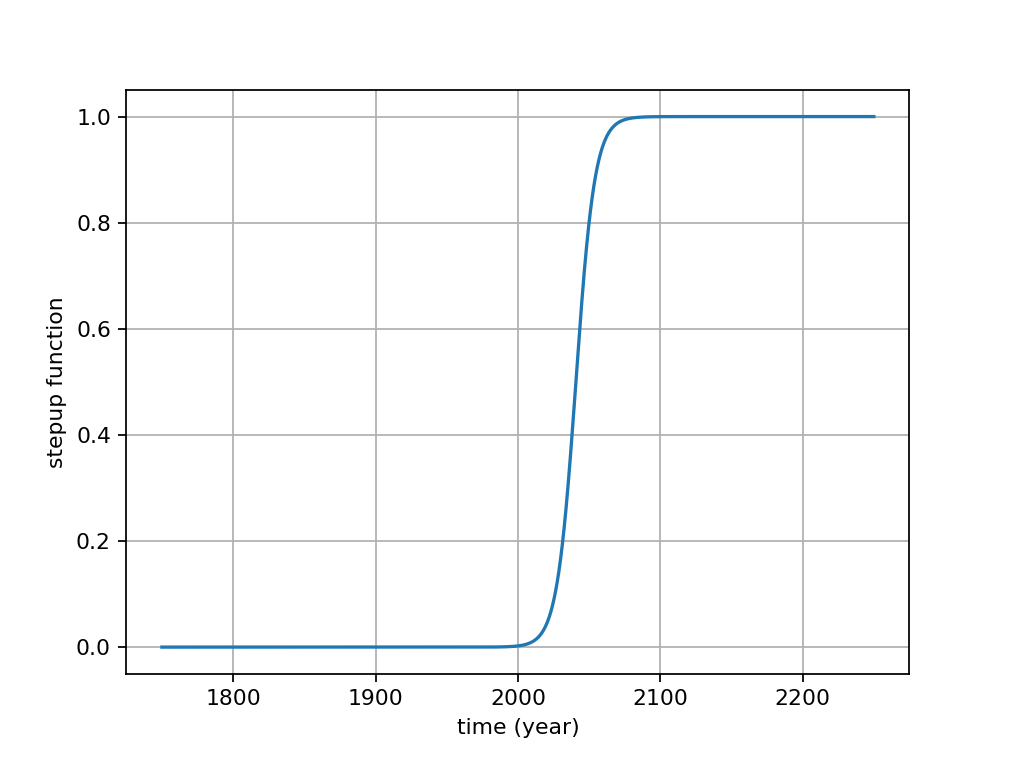

In [7]:
# Calculate the transition year of the sigmoid function from Eq. 2
t_trans = t_peak + delta_t_trans/3*np.log(3/(k*delta_t_trans)-1)
print(t_trans)

# Examining the step-up sigmoid function graphically
mysigmaup = sigmaup(t,t_trans,delta_t_trans)

# Graph the result
plt.figure()
plt.plot(t,mysigmaup)
plt.xlabel('time (year)')
plt.ylabel('stepup function')
plt.grid()

### Your turn
Now write (and test) a *step-down* function. It should be called "sigmadown", and take the same arguments as sigmaup does. However, it should return a value of 1 when $t << t_{trans}$, and a value of 0 when $t > t_{trans}$. 

In [8]:
# Define your step-down sigmoid function. 
### BEGIN SOLUTION 
def sigmadown(t,transitiontime,transitiontimeinterval):
  # Generates a sigmoid (smooth step-down) function
  return 1 - sigmaup(t,transitiontime,transitiontimeinterval)
### END SOLUTION

<IPython.core.display.Javascript object>


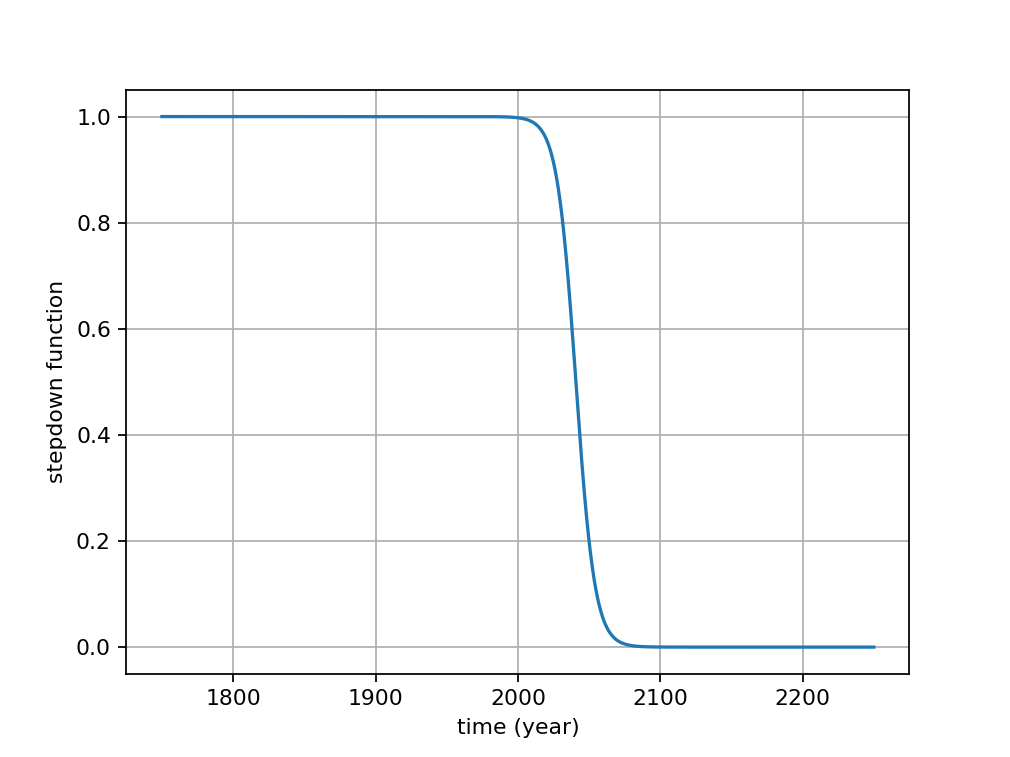

In [9]:
# Evaluate the step-down sigmoid function (call the resulting variable 'mysigmadown')
### BEGIN SOLUTION 
mysigmadown = sigmadown(t,t_trans,delta_t_trans)
### END SOLUTION

# Graph mysigmadown as a function of time
### BEGIN SOLUTION 
plt.figure()
plt.plot(t,mysigmadown)
plt.xlabel('time (year)')
plt.ylabel('stepdown function')
plt.grid()
### END SOLUTION

### Pause for analysis
Take a moment to study the graph you just produced, and provide brief answers to the following questions in the cell below: 
1. This is about the 80/20 rule: In what year is the transition 20% under way? 80%? How many years separate these two? The zoom function (a box in the set of cells right below the figure) will be helpful here.
2. Change $t_{peak}$ and $\Delta t_{trans}$ (and then use Cell/Run All Above). Does the curve change appropriately?

### Next: Getting $N$
Now we're ready to calculate $N$. Do so in the cell below (and call the variable "myN"). Don't forget that in evaluating the denominator of Eq. (3), the exponent function and the sigmoid function should take $t_o$ instead of $t$. If you've done things right, you should get a really small number, on the order of $10^{-21}$.

In [10]:
# Calculate and print N (call the variable "myN") 
### BEGIN SOLUTION
myN = eps_0/(np.exp(k*t_0)*sigmadown(t_0,t_trans,delta_t_trans))
print(myN)
### END SOLUTION

1.575398855728131e-21


### Next: Getting $\epsilon (t)$
Now we're ready to calculate $\epsilon(t)$. Do so in the cell below (calling the variable "myeps"), and then graph myeps as a function of time.

<IPython.core.display.Javascript object>


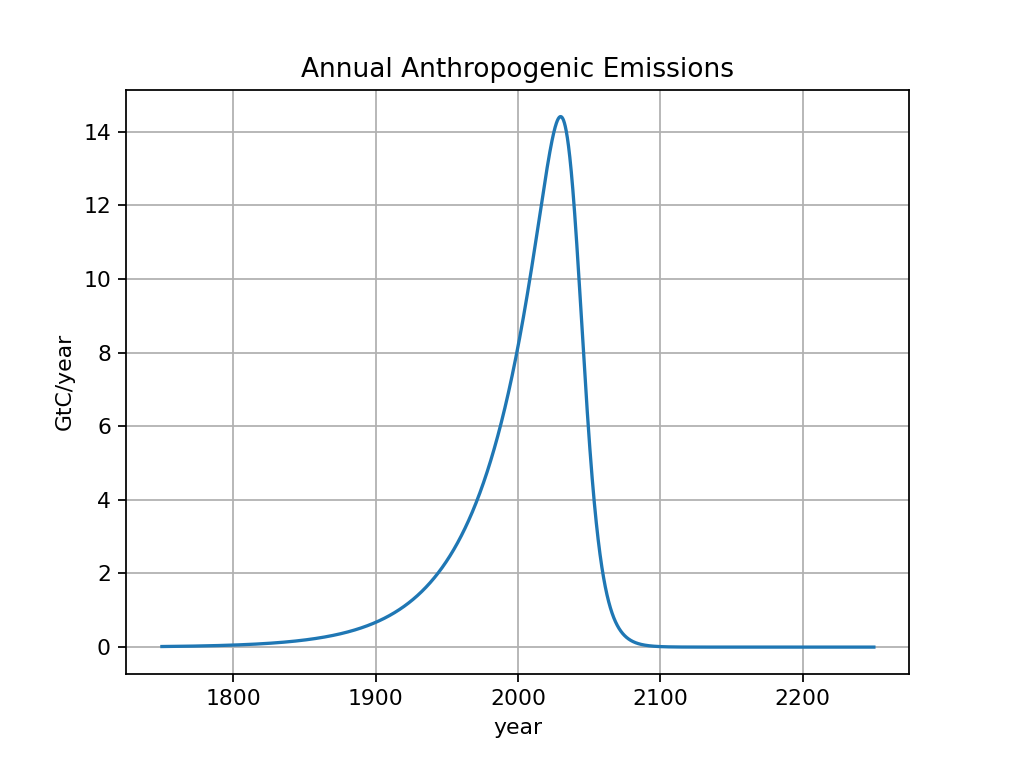

Text(0, 0.5, 'GtC/year')

In [11]:
# Implement Eq. (1)
### BEGIN SOLUTION
myeps = myN*myexp*mysigmadown
### END SOLUTION

# Graph myeps as a function of time
# BEGIN SOLUTION
plt.figure()
plt.plot(t,myeps)
plt.grid(True)
plt.title('Annual Anthropogenic Emissions')
plt.xlabel('year')
plt.ylabel('GtC/year')
### END SOLUTION

### Pause for analysis
Take a moment to study the graph you just produced, and respond (in the next cell below) to these prompots:

1. Did emissions *peak* in the year you expected it to?  
1. How many years after the peak emission year do emissions drop to half that amount? 
1. Did the normalization work out? Give a few details on the precise year you pegged to.

### Revising your parameters
At this point, you might want to revise some of your parameters. Going on, we'll want an emissions scenario that captures what looks like _all_ the anthropogenic emissions -- which means you should probably make t_start closer to 1800, or maybe even earlier. There's also good evidence that the impacts of emissions will be felt after the year 2100 -- which means you should probably make t_stop closer to 2200, or even later.

So, revise the parameters in the "Parameters" accordingly, and use Cell/Run All Above before proceeding.

### Setting up your data with metadata for storage
The code below packages your results into a _Pandas_ dataframe. Why? Well, we want to save the data for use later, and _Pandas_ is a kind of industry standard. It's not quite enough, however, to store data: we really need to attach _metadata_ to these data. Metadata include things like the units of our data, and also parameters like the growth rate, the transition year, etc.

As you can see from the example below, we do this by creating a bigger structure -- a _dictionary_. A dictionary has the capability of holding lots of different pieces -- called _elements_ -- of various sizes and shapes. One element of the dictionary is the entire _Pandas_ dataframe. 

In [12]:
# Create an empty dataframe
epsdf = pd.DataFrame()

# Insert the time and emissions columns into the dataframe
epsdf.insert(loc=0, column='time', value=t)
epsdf.insert(loc=1, column='emissions', value=myeps)

# Create an empty dictionary
epsdictionary = dict()

# Add in our dataframe
epsdictionary['dataframe']=epsdf

# Let's see what we have in this dictionary
display(epsdictionary)

{'dataframe':             time     emissions
 0     1750.00000  1.576791e-02
 1     1750.10002  1.580739e-02
 2     1750.20004  1.584696e-02
 3     1750.30006  1.588664e-02
 4     1750.40008  1.592641e-02
 ...          ...           ...
 4995  2249.59992  1.032463e-10
 4996  2249.69994  1.025723e-10
 4997  2249.79996  1.009595e-10
 4998  2249.89998  9.933797e-11
 4999  2250.00000  9.864718e-11
 
 [5000 rows x 2 columns]}

### Adding in metadata as elements of our dictionary
The first two lines of the cell below add two elements of metadata to our dictionary.

In [13]:
# This adds two elements to the dictionary
epsdictionary['emission units']='GtC/year'
epsdictionary['k']=k

# This displays the contents of the dictionary
display(epsdictionary)

{'dataframe':             time     emissions
 0     1750.00000  1.576791e-02
 1     1750.10002  1.580739e-02
 2     1750.20004  1.584696e-02
 3     1750.30006  1.588664e-02
 4     1750.40008  1.592641e-02
 ...          ...           ...
 4995  2249.59992  1.032463e-10
 4996  2249.69994  1.025723e-10
 4997  2249.79996  1.009595e-10
 4998  2249.89998  9.933797e-11
 4999  2250.00000  9.864718e-11
 
 [5000 rows x 2 columns],
 'emission units': 'GtC/year',
 'k': 0.025}

### Your turn
Add the following elements of metadata to your dictionary:
1. The pegged year,
1. The emissions at that pegged year,
1. The year of peak emissions,
1. The transition time, and
1. The transition time interval.

Then use "display" to confirm they were added properly.

In [14]:
# Add the four additional elements mentioned above to your dictionary
### BEGIN SOLUTION
epsdictionary['t_0'] = t_0
epsdictionary['eps_0'] = eps_0
epsdictionary['t_trans'] = t_trans
epsdictionary['t_peak'] = t_peak
epsdictionary['delta_t_trans'] = delta_t_trans
display(epsdictionary)
### END SOLUTION

{'dataframe':             time     emissions
 0     1750.00000  1.576791e-02
 1     1750.10002  1.580739e-02
 2     1750.20004  1.584696e-02
 3     1750.30006  1.588664e-02
 4     1750.40008  1.592641e-02
 ...          ...           ...
 4995  2249.59992  1.032463e-10
 4996  2249.69994  1.025723e-10
 4997  2249.79996  1.009595e-10
 4998  2249.89998  9.933797e-11
 4999  2250.00000  9.864718e-11
 
 [5000 rows x 2 columns],
 'emission units': 'GtC/year',
 'k': 0.025,
 't_0': 2018,
 'eps_0': 12.4,
 't_trans': 2040.729586082894,
 't_peak': 2030,
 'delta_t_trans': 20}

### Saving your emissions scenario
Use the cell below to save your emissions scenario (the entire dictionary -- data and metadata) as a file. Here's some sample code -- although you might want to modify the filename to something more meaningful, especially if you plan on saving multiple scenarios.

    # Decide on a name for the file, and then save to that file
    filename = 'Scenario1.hdf5'
    h5io.write_hdf5(filename, epsdictionary, overwrite=True)

In [15]:
# Assign a name for the file, and save it
### BEGIN SOLUTION
filename = 'Peaks_in_2030.hdf5'
h5io.write_hdf5(filename, epsdictionary, overwrite=True)

# Checking it's there
%ls -al
### END SOLUTION

total 1996
drwxr-xr-x  3 instructor instructor   4096 Dec 23 17:40 ./
drwxr-xr-x 22 instructor instructor   4096 Dec 14 09:46 ../
-rw-r--r--  1 instructor instructor 143172 Aug 22 13:53 EnroadsBAU.hdf5
drwxr-xr-x  2 instructor instructor   4096 Aug 22 13:53 .ipynb_checkpoints/
-rw-r--r--  1 instructor instructor 144712 Sep 16 17:42 Peaks_in_2020.hdf5
-rw-r--r--  1 instructor instructor  48712 Oct  3 17:48 Peaks_in_2025.hdf5
-rw-r--r--  1 instructor instructor 144984 Dec 23 17:41 Peaks_in_2030.hdf5
-rw-r--r--  1 instructor instructor 743172 Aug 22 14:15 .Scenario1.hdf5
-rw-r--r--  1 instructor instructor  47172 Aug 22 14:15 .Scenario2.hdf5
-rw-r--r--  1 instructor instructor  47172 Aug 22 14:15 .Scenario3.hdf5
-rw-r--r--  1 instructor instructor 697867 Dec 23 17:40 ScheduledFlows.ipynb


### Double-checking
It's often nice to double-check that you really did save what you thought you did. The cell below will load the file you just saved and print out some information about it.

In [16]:
# This shows what I thought I saved
print('What I thought I saved:')
display(epsdictionary)
      
# This loads the stored dictionary
epsdictionary_fromfile = h5io.read_hdf5(filename)

# This shows what's in it
print('What I retrieved:')
display(epsdictionary_fromfile)

What I thought I saved:


{'dataframe':             time     emissions
 0     1750.00000  1.576791e-02
 1     1750.10002  1.580739e-02
 2     1750.20004  1.584696e-02
 3     1750.30006  1.588664e-02
 4     1750.40008  1.592641e-02
 ...          ...           ...
 4995  2249.59992  1.032463e-10
 4996  2249.69994  1.025723e-10
 4997  2249.79996  1.009595e-10
 4998  2249.89998  9.933797e-11
 4999  2250.00000  9.864718e-11
 
 [5000 rows x 2 columns],
 'emission units': 'GtC/year',
 'k': 0.025,
 't_0': 2018,
 'eps_0': 12.4,
 't_trans': 2040.729586082894,
 't_peak': 2030,
 'delta_t_trans': 20}

What I retrieved:


{'dataframe':             time     emissions
 0     1750.00000  1.576791e-02
 1     1750.10002  1.580739e-02
 2     1750.20004  1.584696e-02
 3     1750.30006  1.588664e-02
 4     1750.40008  1.592641e-02
 ...          ...           ...
 4995  2249.59992  1.032463e-10
 4996  2249.69994  1.025723e-10
 4997  2249.79996  1.009595e-10
 4998  2249.89998  9.933797e-11
 4999  2250.00000  9.864718e-11
 
 [5000 rows x 2 columns],
 'delta_t_trans': 20,
 'emission units': 'GtC/year',
 'eps_0': 12.4,
 'k': 0.025,
 't_0': 2018,
 't_peak': 2030,
 't_trans': 2040.729586082894}

### Refresh/save/validate
Almost done! To double-check everything is OK, repeat the "Three steps for refreshing and saving your code," and press the "Validate" button (as usual).

### Close/submit/logout
1. Close this notebook using the "File/Close and Halt" dropdown menu
1. Using the Assignments tab, submit this notebook
1. Press the Logout tab of the Home Page